In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow

In [ ]:
df =pd.read_csv('/content/bank_transactions_data_2.csv')
df.head(2)

TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81              1   
1           68             Doctor                  141              1   

   AccountBalance PreviousTransactionDate  
0         5112.21     2024-11-04 08:08:08  
1        13758.91     2024-11-04 08:09:35

In [ ]:
print(df.shape)
print(df.size)

(2512, 16)
40192


In [ ]:
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [ ]:
df.describe()

TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000

In [ ]:
pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 41.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=541430ffece85f3501e4ae565075c85ca3fd086ca4da993a7fa736c5e1151295
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
report  = ProfileReport(df,explorative=True,title='Bank Transactions Report')

In [ ]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.head(1)

TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81              1   

   AccountBalance PreviousTransactionDate  
0         5112.21     2024-11-04 08:08:08

In [ ]:
df.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

In [ ]:
datetime_str = "2023-04-11 16:29:14"
date, time = datetime_str.split(" ")

In [ ]:
transc_date= df['TransactionDate'].str.split(" ")
df['date'] = transc_date.str[0]
df['time'] = transc_date.str[1]
prev_transac_date = df['PreviousTransactionDate'].str.split(" ")
df['prev_date'] = prev_transac_date.str[0]
df['prev_time'] = prev_transac_date.str[1]

In [ ]:
df.head(1)

TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81              1   

   AccountBalance PreviousTransactionDate        date      time   prev_date  \
0         5112.21     2024-11-04 08:08:08  2023-04-11  16:29:14  2024-11-04   

  prev_time  
0  08:08:08

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['prev_date'] = pd.to_datetime(df['prev_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   object        
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

In [ ]:
df.head(1)

TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81              1   

   AccountBalance PreviousTransactionDate       date      time  prev_date  \
0         5112.21     2024-11-04 08:08:08 2023-04-11  16:29:14 2024-11-04   

  prev_time  
0  08:08:08

In [ ]:
df['time'] = pd.to_datetime(df['time'],format='%H:%M:%S')
df['prev_time'] = pd.to_datetime(df['prev_time'],format='%H:%M:%S')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   object        
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

In [ ]:
df_numeric = df.select_dtypes(include = ['float64','int64'])
df_object = df.select_dtypes(include = ['object'])
df_date_time = df[['date','time','prev_date','prev_time']]

In [ ]:
df_numeric.corr()

TransactionAmount  CustomerAge  TransactionDuration  \
TransactionAmount             1.000000    -0.025616             0.004359   
CustomerAge                  -0.025616     1.000000            -0.017936   
TransactionDuration           0.004359    -0.017936             1.000000   
LoginAttempts                -0.008445     0.007653             0.032639   
AccountBalance               -0.025165     0.319942             0.005577   

                     LoginAttempts  AccountBalance  
TransactionAmount        -0.008445       -0.025165  
CustomerAge               0.007653        0.319942  
TransactionDuration       0.032639        0.005577  
LoginAttempts             1.000000        0.014999  
AccountBalance            0.014999        1.000000

In [ ]:
df.agg({'TransactionDate':['min','max','count'],
        'TransactionAmount':['min','max','count'],
        'TransactionDuration':['min','max','count']})

TransactionDate  TransactionAmount  TransactionDuration
min    2023-01-02 16:00:06               0.26                   10
max    2024-01-01 18:21:50            1919.11                  300
count                 2512            2512.00                 2512

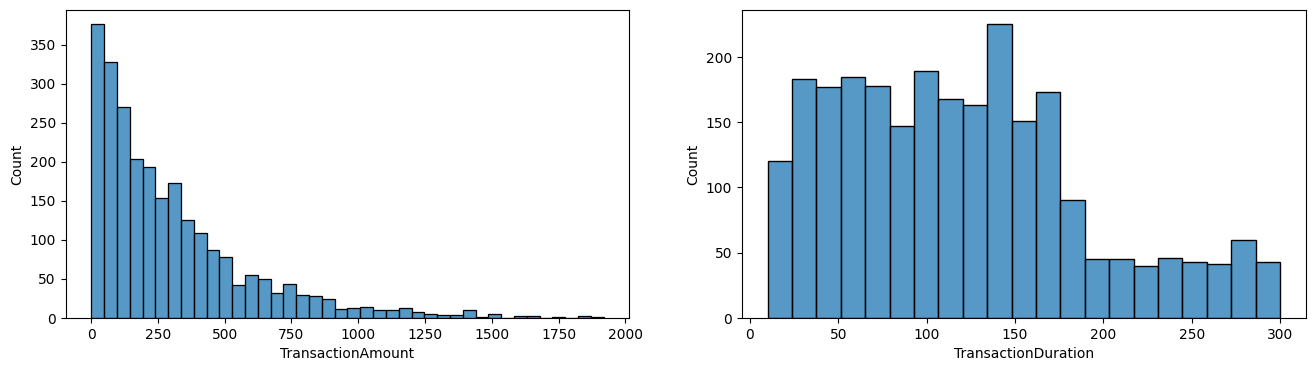

In [ ]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
sns.histplot(df['TransactionAmount'])
plt.subplot(1,2,2)
sns.histplot(df['TransactionDuration'])
plt.show()

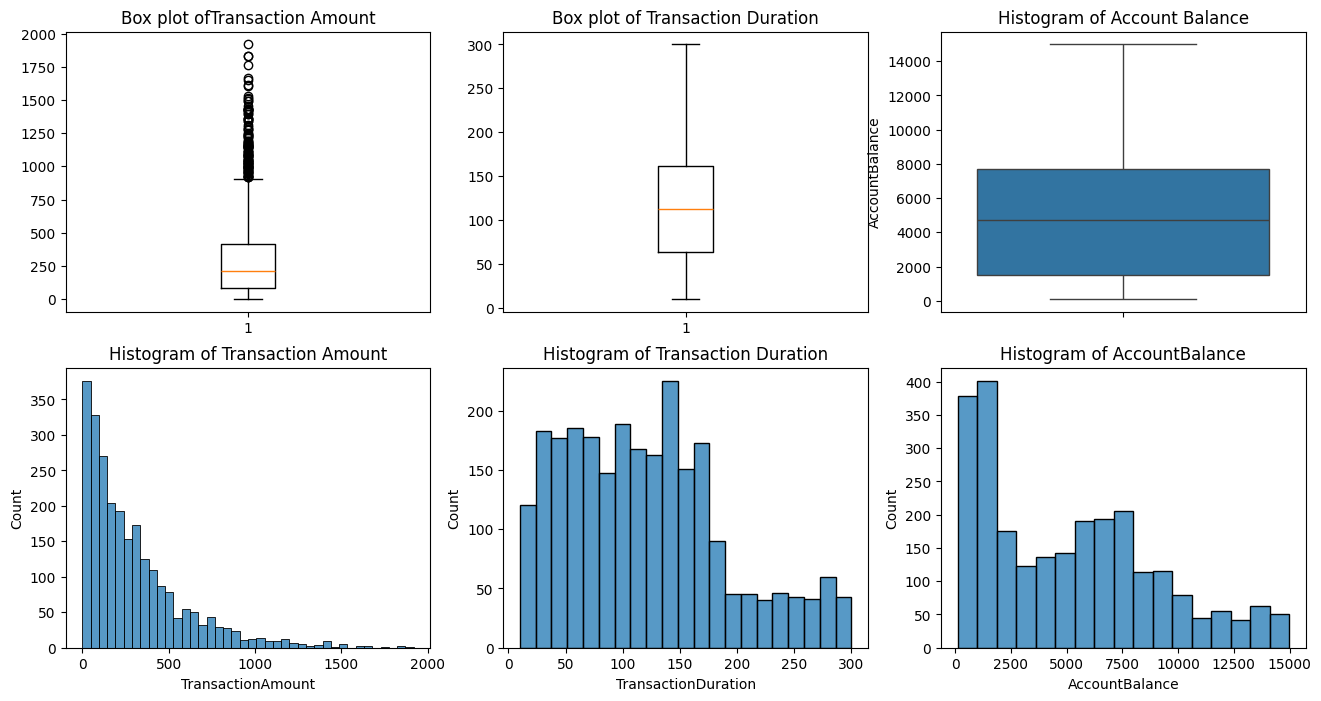

In [ ]:
plt.figure(figsize = (16,8))

plt.subplot(2,3,1)
plt.boxplot(df['TransactionAmount'])
plt.title('Box plot ofTransaction Amount')
plt.subplot(2,3,2)
plt.boxplot(df['TransactionDuration'])
plt.title('Box plot of Transaction Duration')
plt.subplot(2,3,3)
sns.boxplot(df['AccountBalance'])
plt.title('Histogram of Account Balance')
plt.subplot(2,3,4)
sns.histplot(df['TransactionAmount'])
plt.title('Histogram of Transaction Amount')
plt.subplot(2,3,5)
sns.histplot(df['TransactionDuration'])
plt.title('Histogram of Transaction Duration')
plt.subplot(2,3,6)
sns.histplot(df['AccountBalance'])
plt.title('Histogram of AccountBalance')
plt.show()

In [ ]:
fig = px.scatter(df,x = 'CustomerAge',y = 'TransactionAmount',size = 'TransactionAmount',color = 'TransactionType',hover_name = 'TransactionID')
fig.show()

In [ ]:
fig = px.sunburst(df,path = ['TransactionType','Location'],values = 'TransactionAmount')
fig.show()

In [ ]:
fig = px.bar(df,x = 'TransactionType',y = 'TransactionAmount',color = 'TransactionType',barmode = 'group')
fig.show()

In [ ]:
fig = px.scatter(df,x = 'CustomerAge',y = 'TransactionAmount',size = 'TransactionAmount',color = 'CustomerOccupation',hover_name = 'TransactionID')
fig.show()

In [ ]:
fig = px.treemap(df,path = ['TransactionType','CustomerOccupation'],values = 'TransactionAmount')
fig.show()

In [ ]:
fig = px.bar(df,x = 'CustomerOccupation',y = 'TransactionAmount',color = 'TransactionType',barmode = 'group')
fig.show()

In [ ]:
plt.figure(figsize = (12,3))
fig = px.pie(df,names = 'CustomerOccupation',values = 'TransactionAmount')
fig.show()

<Figure size 1200x300 with 0 Axes>

In [ ]:
fig = px.bar(df,x = 'Channel',y = 'TransactionType',color = 'CustomerOccupation',barmode = 'group')
fig.show()

In [ ]:
df['TransactionAmount'].value_counts(ascending = False).head(10)

TransactionAmount
11.46     3
233.74    2
5.29      2
38.14     2
103.08    2
642.68    2
211.36    2
175.07    2
34.74     2
485.54    2
Name: count, dtype: int64

<ipython-input-36-242922e0a7fe>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




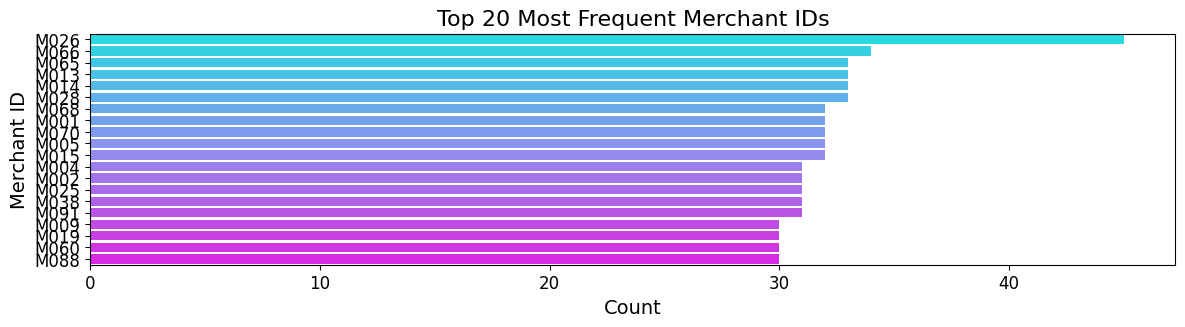

In [ ]:
# Countplot for top 20 most frequent 'MerchantID'
top_20_merchants = df['MerchantID'].value_counts().head(20).index
plt.figure(figsize=(14, 3))
sns.countplot(y=df[df['MerchantID'].isin(top_20_merchants)]['MerchantID'], order=top_20_merchants, palette='cool')
plt.title('Top 20 Most Frequent Merchant IDs', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Merchant ID', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
df.head(1)

TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81              1   

   AccountBalance PreviousTransactionDate       date                time  \
0         5112.21     2024-11-04 08:08:08 2023-04-11 1900-01-01 16:29:14   

   prev_date           prev_time  
0 2024-11-04 1900-01-01 08:08:08

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore
from scipy.cluster.hierarchy import linkage, fcluster
from datetime import datetime


In [ ]:
nu_col = ['TransactionAmount','TransactionDuration','AccountBalance','CustomerAge','TransactionDuration']
cat_col = ['TransactionType','Location','Channel','	CustomerOccupation']

In [ ]:
nu_col = ['TransactionAmount','TransactionDuration','AccountBalance','CustomerAge','TransactionDuration']
cat_col = ['TransactionType','Location','Channel','CustomerOccupation'] # Removed the tab character before 'CustomerOccupation'

sc = StandardScaler()
df_num_sc = pd.DataFrame(sc.fit_transform(df[nu_col]),columns = nu_col)
one_hot = OneHotEncoder(sparse_output=False, drop='first')
df_cat_sc = pd.DataFrame(one_hot.fit_transform(df[cat_col]),columns = one_hot.get_feature_names_out(cat_col)) # Added cat_col in get_feature_names_out

df_new = pd.concat([df_num_sc,df_cat_sc],axis = 1)

In [ ]:
df_new.head(1)

TransactionAmount  TransactionDuration  AccountBalance  CustomerAge  \
0          -0.971275            -0.552443       -0.000537     1.423718   

   TransactionDuration  TransactionType_Debit  Location_Atlanta  \
0            -0.552443                    1.0               0.0   

   Location_Austin  Location_Baltimore  Location_Boston  ...  \
0              0.0                 0.0              0.0  ...   

   Location_San Jose  Location_Seattle  Location_Tucson  \
0                0.0               0.0              0.0   

   Location_Virginia Beach  Location_Washington  Channel_Branch  \
0                      0.0                  0.0             0.0   

   Channel_Online  CustomerOccupation_Engineer  CustomerOccupation_Retired  \
0             0.0                          0.0                         0.0   

   CustomerOccupation_Student  
0                         0.0  

[1 rows x 53 columns]

In [ ]:
df_new.describe()

TransactionAmount  TransactionDuration  AccountBalance   CustomerAge  \
count       2.512000e+03         2.512000e+03    2.512000e+03  2.512000e+03   
mean       -1.414297e-16         7.637203e-17    4.985396e-17  9.900078e-18   
std         1.000199e+00         1.000199e+00    1.000199e+00  1.000199e+00   
min        -1.018657e+00        -1.567456e+00   -1.285344e+00 -1.499493e+00   
25%        -7.390118e-01        -8.097706e-01   -9.255845e-01 -9.935526e-01   
50%        -2.961881e-01        -1.021205e-01   -9.712227e-02  1.832826e-02   
75%         4.006114e-01         5.912336e-01    6.575405e-01  8.053467e-01   
max         5.555266e+00         2.578372e+00    2.529043e+00  1.985874e+00   

       TransactionDuration  TransactionType_Debit  Location_Atlanta  \
count         2.512000e+03            2512.000000       2512.000000   
mean          7.637203e-17               0.773885          0.024283   
std           1.000199e+00               0.418398          0.153958   
min          -1.567456e+00               0.000000          0.000000   
25%          -8.097706e-01               1.000000          0.000000   
50%          -1.021205e-01               1.000000          0.000000   
75%           5.912336e-01               1.000000          0.000000   
max           2.578372e+00               1.000000          1.000000   

       Location_Austin  Location_Baltimore  Location_Boston  ...  \
count      2512.000000         2512.000000      2512.000000  ...   
mean          0.023487            0.020303         0.024283  ...   
std           0.151475            0.141061         0.153958  ...   
min           0.000000            0.000000         0.000000  ...   
25%           0.000000            0.000000         0.000000  ...   
50%           0.000000            0.000000         0.000000  ...   
75%           0.000000            0.000000         0.000000  ...   
max           1.000000            1.000000         1.000000  ...   

       Location_San Jose  Location_Seattle  Location_Tucson  \
count        2512.000000       2512.000000      2512.000000   
mean            0.023487          0.024283         0.026672   
std             0.151475          0.153958         0.161155   
min             0.000000          0.000000         0.000000   
25%             0.000000          0.000000         0.000000   
50%             0.000000          0.000000         0.000000   
75%             0.000000          0.000000         0.000000   
max             1.000000          1.000000         1.000000   

       Location_Virginia Beach  Location_Washington  Channel_Branch  \
count              2512.000000          2512.000000     2512.000000   
mean                  0.021895             0.019108        0.345541   
std                   0.146370             0.136933        0.475639   
min                   0.000000             0.000000        0.000000   
25%                   0.000000             0.000000        0.000000   
50%                   0.000000             0.000000        0.000000   
75%                   0.000000             0.000000        1.000000   
max                   1.000000             1.000000        1.000000   

       Channel_Online  CustomerOccupation_Engineer  \
count     2512.000000                  2512.000000   
mean         0.322850                     0.248806   
std          0.467659                     0.432407   
min          0.000000                     0.000000   
25%          0.000000                     0.000000   
50%          0.000000                     0.000000   
75%          1.000000                     0.000000   
max          1.000000                     1.000000   

       CustomerOccupation_Retired  CustomerOccupation_Student  
count                 2512.000000                 2512.000000  
mean                     0.238455                    0.261545  
std                      0.426224                    0.439563  
min                      0.000000                    0.000000  
25%                      0.

In [ ]:
df_new['Fraud'] = False

In [ ]:
df.head(1)

TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81              1   

   AccountBalance PreviousTransactionDate       date                time  \
0         5112.21     2024-11-04 08:08:08 2023-04-11 1900-01-01 16:29:14   

   prev_date           prev_time  
0 2024-11-04 1900-01-01 08:08:08

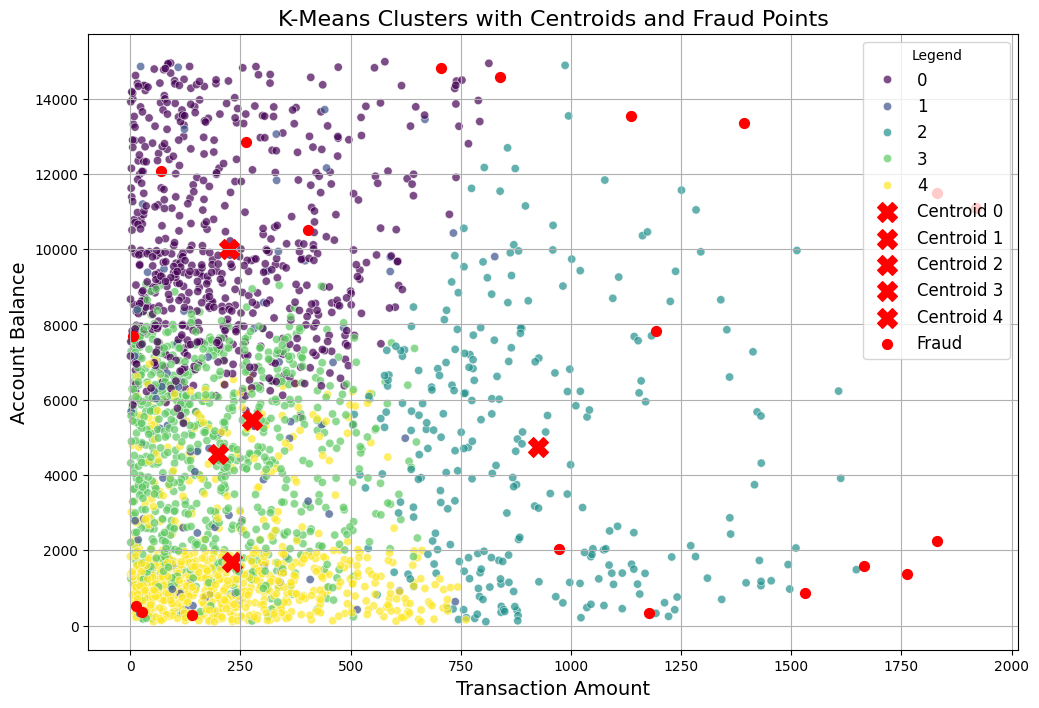

Total Fraudulent Transactions Detected (Using K Means clustering): 20
Fraudulent Transactions Detected:
     TransactionID AccountID  TransactionAmount      TransactionDate  \
146       TX000147   AC00385             973.39  2023-08-30 17:23:20   
231       TX000232   AC00430             705.60  2023-02-20 18:41:43   
274       TX000275   AC00454            1176.28  2023-12-20 16:08:02   
340       TX000341   AC00107            1830.00  2023-03-01 16:31:58   
375       TX000376   AC00316            1392.54  2023-11-20 16:51:14   
394       TX000395   AC00326               6.30  2023-12-14 18:52:54   
593       TX000594   AC00039             139.57  2023-11-17 17:59:11   
653       TX000654   AC00423            1919.11  2023-06-27 17:48:25   
898       TX000899   AC00083            1531.31  2023-10-23 18:00:29   
1055      TX001056   AC00317              13.48  2023-09-20 17:49:53   
1167      TX001168   AC00010             838.57  2023-06-26 16:08:25   
1213      TX001214   AC00170    

In [ ]:
# Identify numeric columns
numeric_cols = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge']

# Standardize numeric columns for clustering
scaler = StandardScaler()
numeric_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Perform K-Means clustering
kmeans = KMeans(n_init='auto')  # FutureProofing
kmeans.fit(numeric_scaled)
n_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(numeric_scaled)
df['KMeans_Cluster'] = kmeans_labels

# Calculate distances from centroids
centroids = kmeans.cluster_centers_
distances = np.linalg.norm(numeric_scaled.values - centroids[kmeans_labels], axis=1)
df['KMeans_Distance'] = distances

# Set threshold: Mean + 3 * Standard Deviation
threshold = distances.mean() + 3 * distances.std()
df['KMeans_Fraud'] = distances > threshold

# Summary of flagged anomalies
fraud_summary = df['KMeans_Fraud'].value_counts()
threshold, fraud_summary, df[['TransactionAmount', 'KMeans_Distance', 'KMeans_Fraud']].head()


# Calculate centroids and scale them back to the original feature space
centroids_scaled = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)

# Add a fraud detection logic (using distance from centroids)
distances = np.linalg.norm(numeric_scaled - centroids_scaled[kmeans_labels], axis=1)
threshold = distances.mean() + 3 * distances.std()
df['Fraud'] = distances > threshold
df['KMeans_Distance'] = distances

# Scatterplot for two features with clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=df['TransactionAmount'],
    y=df['AccountBalance'],
    hue=df['KMeans_Cluster'],
    palette='viridis',
    alpha=0.7,
    legend='full'
)

# Overlay centroids on the scatterplot
for i, centroid in enumerate(centroids_original):
    plt.scatter(
        centroid[numeric_cols.index('TransactionAmount')],
        centroid[numeric_cols.index('AccountBalance')],
        color='red',
        marker='X',
        s=200,
        label=f'Centroid {i}'
    )

# Highlight fraud points
fraud_points = df[df['Fraud']]
plt.scatter(
    fraud_points['TransactionAmount'],
    fraud_points['AccountBalance'],
    color='red',
    marker='o',
    s=50,
    label='Fraud'
)

plt.title('K-Means Clusters with Centroids and Fraud Points', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Account Balance', fontsize=14)
plt.legend(title='Legend', fontsize=12)
plt.grid(True)
plt.show()

# Print summary of fraud points
total_fraud_points = df['Fraud'].sum()
print(f"Total Fraudulent Transactions Detected (Using K Means clustering): {total_fraud_points}")

# Display fraud transactions
print("Fraudulent Transactions Detected:")
print(fraud_points)

In [ ]:
df.head(2)

TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  ...  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM  ...   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM  ...   

   AccountBalance PreviousTransactionDate       date                time  \
0         5112.21     2024-11-04 08:08:08 2023-04-11 1900-01-01 16:29:14   
1        13758.91     2024-11-04 08:09:35 2023-06-27 1900-01-01 16:44:19   

   prev_date           prev_time KMeans_Cluster KMeans_Distance KMeans_Fraud  \
0 2024-11-04 1900-01-01 08:08:08              3         0.91310        False   
1 2024-11-04 1900-01-01 08:09:35              0         1.72316        False   

   Fraud  
0  False  
1  False  

[2 rows x 24 columns]

In [ ]:
df_numeric.head(1)

TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0              14.09           70                   81              1   

   AccountBalance  
0         5112.21

In [ ]:
x = df_numeric
km = KMeans(n_clusters = 5)
y_mean = km.fit(x)

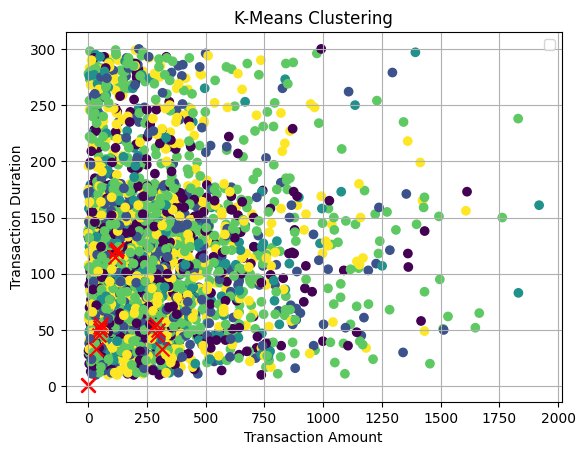

In [ ]:
plt.scatter(x['TransactionAmount'], x['TransactionDuration'], c=km.labels_, cmap='viridis') # Use km.labels_ for color and a colormap
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='red', marker='x', s=100) # Plot cluster centers separately
plt.scatter(km.cluster_centers_[:, 1], km.cluster_centers_[:, 1], c='red', marker='x', s=100)
plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 2], c='red', marker='x', s=100)
plt.scatter(km.cluster_centers_[:, 3], km.cluster_centers_[:, 3], c='red', marker='x', s=100)
#plt.scatter(km.cluster_centers_[:, 4], km.cluster_centers_[:, 4], c='red', marker='x', s=100)
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Duration')
plt.title('K-Means Clustering')
plt.grid()
plt.legend()
plt.show()

Z Score Analysis

In [ ]:
from scipy.stats import zscore

In [ ]:
z_score = zscore(df_numeric)
df['ZScore_Fraud'] = (z_score > 3).any(axis=1)

In [ ]:
numeric_cols = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge']

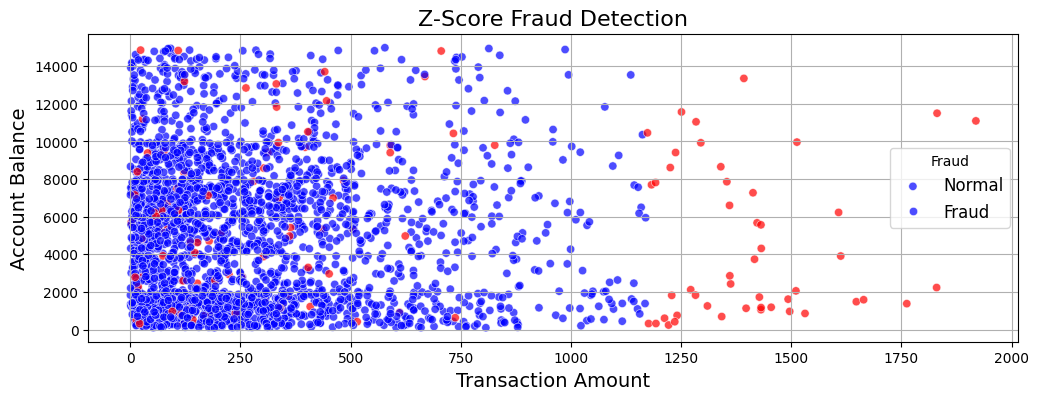

     TransactionID AccountID  TransactionAmount      TransactionDate  \
23        TX000024   AC00453             345.84  2023-05-02 18:25:46   
26        TX000027   AC00441             246.93  2023-04-17 16:37:01   
32        TX000033   AC00060             396.45  2023-09-25 16:26:00   
74        TX000075   AC00265            1212.51  2023-10-04 16:36:29   
85        TX000086   AC00098            1340.19  2023-09-29 17:22:10   
...            ...       ...                ...                  ...   
2380      TX002381   AC00098            1173.74  2023-09-25 16:44:52   
2403      TX002404   AC00111            1493.00  2023-06-07 17:05:41   
2414      TX002415   AC00028            1664.33  2023-09-25 17:11:19   
2423      TX002424   AC00340             332.06  2023-06-21 16:38:54   
2445      TX002446   AC00439             403.01  2023-09-04 17:32:35   

     TransactionType          Location DeviceID       IP Address MerchantID  \
23             Debit        Fort Worth  D000162   191.82

In [ ]:
# Extract fraudulent transactions
zscore_fraud_points = df[df['ZScore_Fraud']]

#summary result
total_zscore_points = df['ZScore_Fraud'].sum()
#print(f"Total Fraudulent Transactions Detected (Using Z-Score Clustering): {total_zscore_points}")

zscore_fraud_points_summary = zscore_fraud_points[numeric_cols + ['ZScore_Fraud']]

df['Fraud'] = df['ZScore_Fraud']

# Scatterplot for Z-Score fraud detection
plt.figure(figsize=(12, 4))
sns.scatterplot(
    x=df['TransactionAmount'],
    y=df['AccountBalance'],
    hue=df['ZScore_Fraud'],
    palette={True: 'red', False: 'blue'},
    alpha=0.7
)
plt.title('Z-Score Fraud Detection', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Account Balance', fontsize=14)
plt.legend(title='Fraud', labels=['Normal', 'Fraud'], fontsize=12)
plt.grid(True)
plt.show()


print(zscore_fraud_points)


3. Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.02, random_state=42)  # 2% expected anomalies
iso_forest.fit(numeric_scaled)  # Fit on the scaled numeric data

IsolationForest(contamination=0.02, random_state=42)

In [ ]:
# Predict anomalies
df['IsoForest_Score'] = iso_forest.decision_function(numeric_scaled)
df['IsoForest_Fraud'] = iso_forest.predict(numeric_scaled) == -1  # Mark anomalies (-1) as fraud

# Extract fraudulent transactions
iso_fraud_points = df[df['IsoForest_Fraud']]

In [ ]:
# Summary of Isolation Forest results
total_iso_fraud_points = df['IsoForest_Fraud'].sum()
iso_fraud_points_summary = iso_fraud_points[['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'IsoForest_Fraud']]

# Adding True values to Fraud column
df['Fraud'] = df['IsoForest_Fraud']

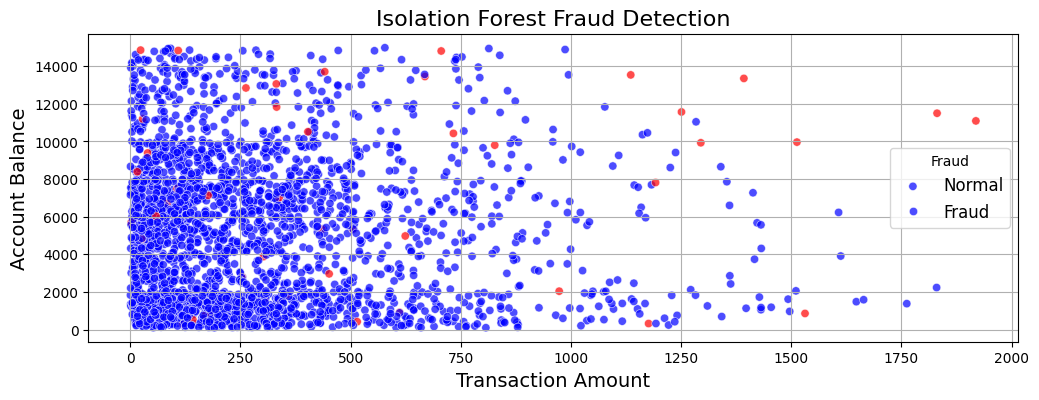

Total Fraudulent Transactions Detected (using isolation forest): 51


In [ ]:
# Scatterplot to visualize fraud points
plt.figure(figsize=(12, 4))
sns.scatterplot(
    x=df['TransactionAmount'],
    y=df['AccountBalance'],
    hue=df['IsoForest_Fraud'],
    palette={True: 'red', False: 'blue'},
    alpha=0.7
)
plt.title('Isolation Forest Fraud Detection', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Account Balance', fontsize=14)
plt.legend(title='Fraud', labels=['Normal', 'Fraud'], fontsize=12)
plt.grid(True)
plt.show()

# Outputs
total_iso_fraud_points, iso_fraud_points_summary.head(), iso_fraud_points_summary.shape

# Confirm the save location and number of frauds
print(f"Total Fraudulent Transactions Detected (using isolation forest): {total_iso_fraud_points}")

4. Logistic Regression

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Define relevant columns for logistic regression
features = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance','CustomerAge']
target = 'Fraud'

In [ ]:
x = df[features]
y = df[target]

In [ ]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size = 0.25,random_state = 42)
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = log_reg.predict(x_test)

In [ ]:
# Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      1.00       616
        True       0.89      0.67      0.76        12

    accuracy                           0.99       628
   macro avg       0.94      0.83      0.88       628
weighted avg       0.99      0.99      0.99       628



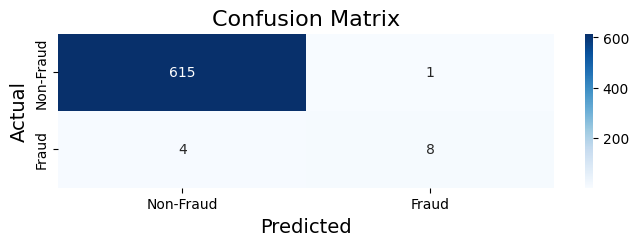

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

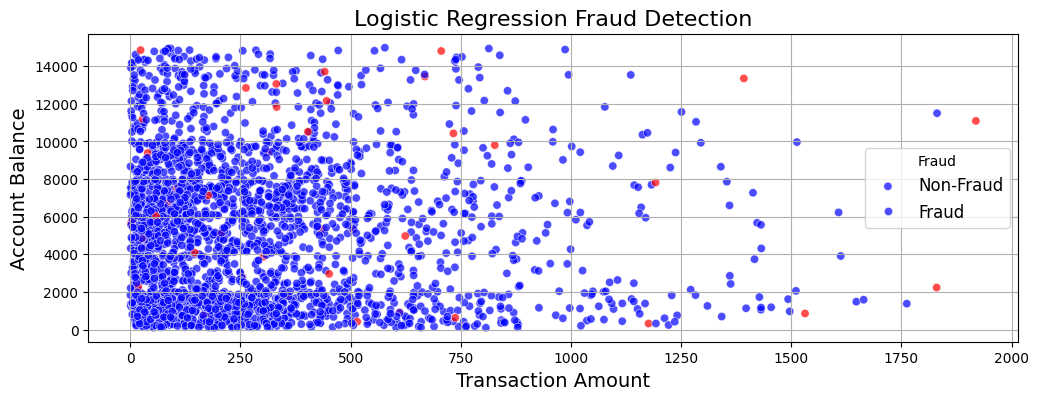

In [ ]:
# Add predictions to the dataset
df['LogReg_Fraud'] = log_reg.predict(x_sc)
df['Fraud'] |= df['LogReg_Fraud']

# Visualize fraud vs. non-fraud transactions
plt.figure(figsize=(12, 4))
sns.scatterplot(
    x=df['TransactionAmount'],
    y=df['AccountBalance'],
    hue=df['LogReg_Fraud'],
    palette={1: 'red', 0: 'blue'},
    alpha=0.7
)
plt.title('Logistic Regression Fraud Detection', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Account Balance', fontsize=14)
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'], fontsize=12)
plt.grid(True)
plt.show()

5. DBSCAN Analysis

In [ ]:
from sklearn.cluster import DBSCAN

# Define features for DBSCAN clustering
features = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
x= df[features]

In [ ]:
# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Apply DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(x_scaled)
df['DBSCAN_Cluster'] = dbscan_labels

In [ ]:
# Flag fraud points (noise points are labeled -1)
df['DBSCAN_Fraud'] = df['DBSCAN_Cluster'] == -1

# Extract fraudulent transactions
dbscan_fraud_points = df[df['DBSCAN_Fraud']]


In [ ]:
# Summary of results
total_dbscan_fraud_points = df['DBSCAN_Fraud'].sum()
dbscan_fraud_points_summary = dbscan_fraud_points[['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'DBSCAN_Fraud']]

# Mark noise points in Fraud column
df['Fraud'] |= df['DBSCAN_Fraud']

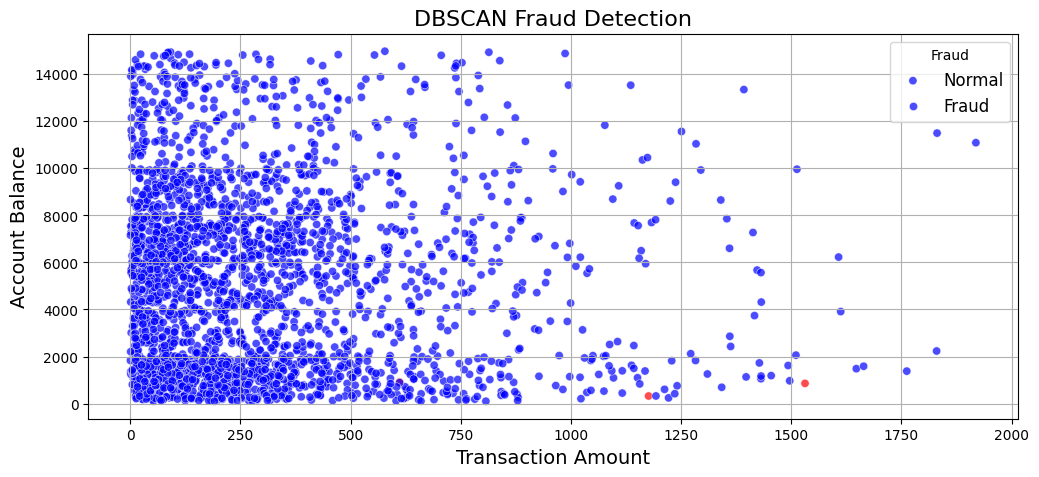

Total Fraudulent Transactions Detected by DBSCAN: 3
    TransactionID AccountID  TransactionAmount      TransactionDate  \
274      TX000275   AC00454            1176.28  2023-12-20 16:08:02   
454      TX000455   AC00264             611.11  2023-10-18 18:32:31   
898      TX000899   AC00083            1531.31  2023-10-23 18:00:29   

    TransactionType     Location DeviceID      IP Address MerchantID Channel  \
274          Credit  Kansas City  D000476     50.202.8.53       M074     ATM   
454           Debit      Detroit  D000215  141.201.46.191       M045     ATM   
898           Debit    San Diego  D000319  91.204.200.167       M078  Online   

     ...  KMeans_Cluster KMeans_Distance  KMeans_Fraud  Fraud  ZScore_Fraud  \
274  ...               1        3.818890          True   True          True   
454  ...               1        3.029864         False   True          True   
898  ...               1        4.806462          True   True          True   

    IsoForest_Score IsoFo

In [ ]:
# Scatterplot for DBSCAN fraud detection
plt.figure(figsize=(12, 5))
sns.scatterplot(
    x=df['TransactionAmount'],
    y=df['AccountBalance'],
    hue=df['DBSCAN_Fraud'],
    palette={True: 'red', False: 'blue'},
    alpha=0.7
)
plt.title('DBSCAN Fraud Detection', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Account Balance', fontsize=14)
plt.legend(title='Fraud', labels=['Normal', 'Fraud'], fontsize=12)
plt.grid(True)
plt.show()

# Summary
print(f"Total Fraudulent Transactions Detected by DBSCAN: {total_dbscan_fraud_points}")
print(dbscan_fraud_points)

In [ ]:
df.head(1)

TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  ...  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM  ...   

   KMeans_Cluster KMeans_Distance  KMeans_Fraud  Fraud  ZScore_Fraud  \
0               3          0.9131         False  False         False   

  IsoForest_Score IsoForest_Fraud LogReg_Fraud DBSCAN_Cluster DBSCAN_Fraud  
0        0.173391           False        False              0        False  

[1 rows x 30 columns]

In [ ]:
numeric_cols = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge']
dff = df[numeric_cols]

In [ ]:
dff.head(1)

TransactionAmount  TransactionDuration  LoginAttempts  AccountBalance  \
0              14.09                   81              1         5112.21   

   CustomerAge  
0           70

In [ ]:
x = dff['AccountBalance']
y = dff.iloc[:,-1]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

In [ ]:
lr = LinearRegression()
lr.fit(x_train.values.reshape(-1,1),y_train)
y_pred = lr.predict(x_test.values.reshape(-1,1))

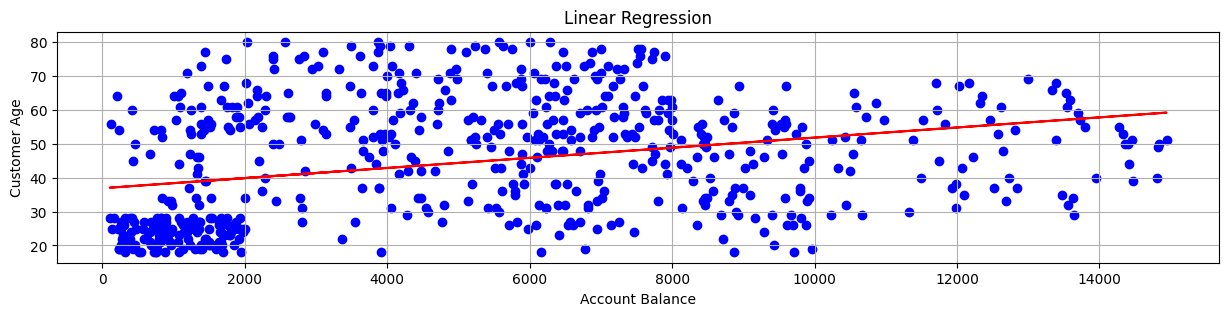

In [ ]:
plt.figure(figsize = (15,3))
plt.scatter(x_test,y_test,color = 'blue')
plt.plot(x_test,y_pred,color = 'red')
plt.xlabel('Account Balance')
plt.ylabel('Customer Age')
plt.title('Linear Regression')
plt.grid()
plt.show()

In [ ]:
df1 = df[['TransactionAmount','TransactionType','Channel','CustomerAge','CustomerOccupation','AccountBalance']]

In [ ]:
df1.head(1)

TransactionAmount TransactionType Channel  CustomerAge CustomerOccupation  \
0              14.09           Debit     ATM           70             Doctor   

   AccountBalance  
0         5112.21

In [ ]:
le = LabelEncoder()
df1['le_TransactionType'] = le.fit_transform(df1['TransactionType'])
df1['le_Channel'] = le.fit_transform(df1['Channel'])
df1['le_CustomerOccupation'] = le.fit_transform(df1['CustomerOccupation'])

<ipython-input-86-def6d88bbd02>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-86-def6d88bbd02>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-86-def6d88bbd02>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df1.head(1)

TransactionAmount TransactionType Channel  CustomerAge CustomerOccupation  \
0              14.09           Debit     ATM           70             Doctor   

   AccountBalance  le_TransactionType  le_Channel  le_CustomerOccupation  
0         5112.21                   1           0                      0

In [ ]:
sc = StandardScaler()
df1['sc_TransactionAmount'] = sc.fit_transform(df1[['TransactionAmount']])
df1['sc_AccountBalance'] = sc.fit_transform(df1[['AccountBalance']])

<ipython-input-89-47f9654ee5f4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-89-47f9654ee5f4>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df1['sc_CustomerAge'] = sc.fit_transform(df1[['CustomerAge']])

<ipython-input-102-4a011c1f895e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df1.head(1)

TransactionAmount TransactionType Channel  CustomerAge CustomerOccupation  \
0              14.09           Debit     ATM           70             Doctor   

   AccountBalance  le_TransactionType  le_Channel  le_CustomerOccupation  \
0         5112.21                   1           0                      0   

   sc_TransactionAmount  sc_AccountBalance  sc_CustomerAge  
0             -0.971275          -0.000537        1.423718

In [ ]:
x = df1.iloc[:,[6,7]]
y = df1['le_Channel']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



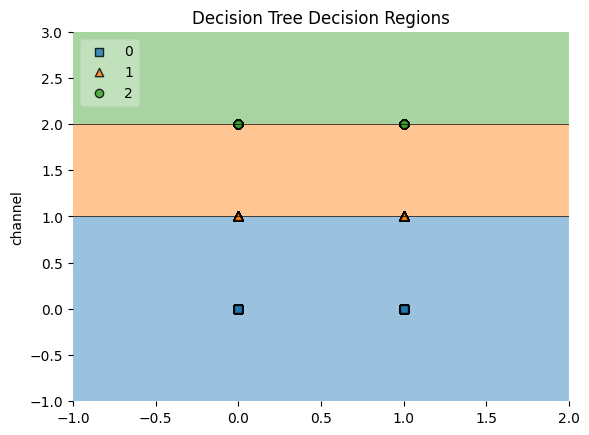

In [ ]:
from mlxtend.plotting import plot_decision_regions

# Assuming 'dt' was intended to be a DecisionTreeClassifier
dt = DecisionTreeClassifier() # Initializing DecisionTreeClassifier
dt.fit(x_train, y_train)  # Training the classifier

# Now you can plot the decision regions
plot_decision_regions(x.values, y.values, clf=dt, legend=2)
#plt.xlabel('TransactionAmount')
plt.ylabel('channel')
plt.title('Decision Tree Decision Regions')
plt.show()

In [ ]:
df1.head(1)

TransactionAmount TransactionType Channel  CustomerAge CustomerOccupation  \
0              14.09           Debit     ATM           70             Doctor   

   AccountBalance  le_TransactionType  le_Channel  le_CustomerOccupation  \
0         5112.21                   1           0                      0   

   sc_TransactionAmount  sc_AccountBalance  sc_CustomerAge  
0             -0.971275          -0.000537        1.423718

In [ ]:
x = df1[['le_TransactionType','sc_CustomerAge','le_CustomerOccupation','sc_TransactionAmount','sc_AccountBalance']]
y = df1['le_Channel']

In [ ]:
from sklearn.svm import SVR

In [ ]:
svm  = SVR(kernel = 'linear')
svm.fit(x,y)

SVR(kernel='linear')

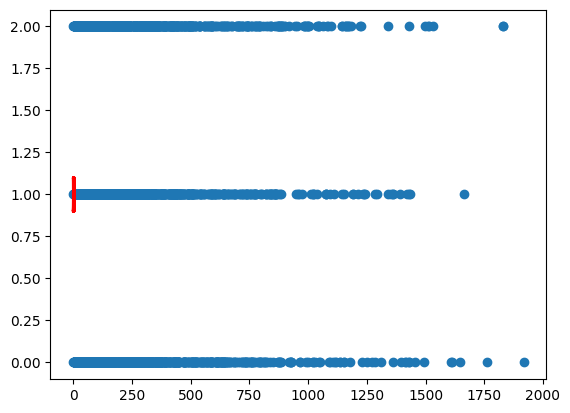

In [ ]:
plt.scatter(df1['TransactionAmount'],y)
plt.plot(x,svm.predict(x),color = 'red')
plt.show()

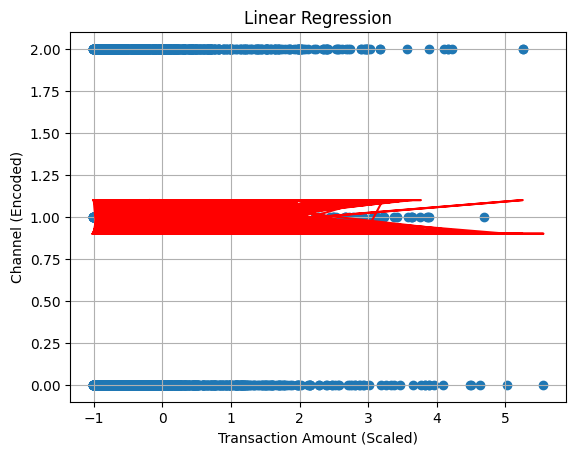

In [ ]:
# Extract a single column from x for plotting
x_plot = x['sc_TransactionAmount']  # or any other column from x

plt.scatter(x_plot, y)
plt.plot(x_plot, svm.predict(x), color='red')  # Adjust prediction to use x_plot if necessary
plt.xlabel('Transaction Amount (Scaled)')  # Update x-axis label accordingly
plt.ylabel('Channel (Encoded)')  # Update y-axis label accordingly
plt.title('Linear Regression')  # Or 'SVM Regression' if that's what you're using
plt.grid()
plt.show()

In [ ]:
df1.head(1)

TransactionAmount TransactionType Channel  CustomerAge CustomerOccupation  \
0              14.09           Debit     ATM           70             Doctor   

   AccountBalance  le_TransactionType  le_Channel  le_CustomerOccupation  \
0         5112.21                   1           0                      0   

   sc_TransactionAmount  sc_AccountBalance  sc_CustomerAge  
0             -0.971275          -0.000537        1.423718

In [ ]:
x = df1['TransactionAmount']
y = df1['le_Channel']

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [ ]:
lg = LogisticRegression()
lg.fit(x_train.values.reshape(-1,1),y_train)
y_pred = lg.predict(x_test.values.reshape(-1,1))

In [ ]:
accuracy_score(y_test,y_pred)

0.34394904458598724

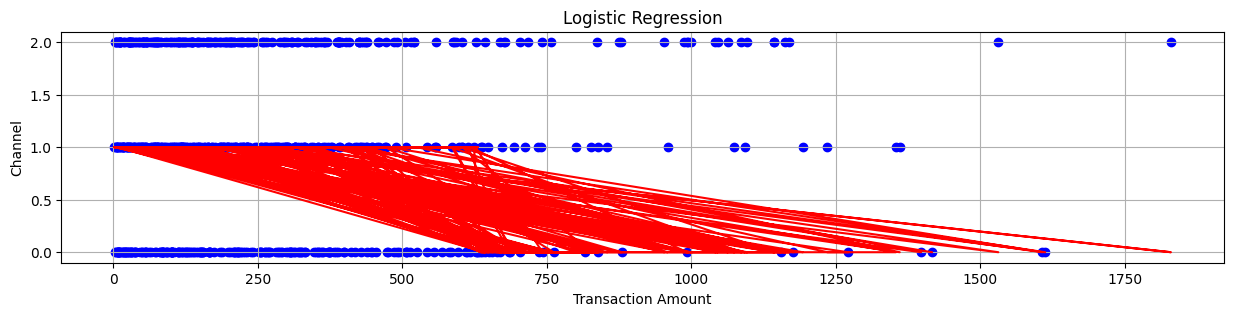

In [ ]:
plt.figure(figsize = (15,3))
plt.scatter(x_test,y_test,color = 'blue')
plt.plot(x_test,y_pred,color = 'red')
plt.xlabel('Transaction Amount')
plt.ylabel('Channel')
plt.title('Logistic Regression')
plt.grid()
plt.show()


In [ ]:
df1['TransactionType'].value_counts()

TransactionType
Debit     1944
Credit     568
Name: count, dtype: int64

In [ ]:
df1.head(1)

TransactionAmount TransactionType Channel  CustomerAge CustomerOccupation  \
0              14.09           Debit     ATM           70             Doctor   

   AccountBalance  le_TransactionType  le_Channel  le_CustomerOccupation  \
0         5112.21                   1           0                      0   

   sc_TransactionAmount  sc_AccountBalance  sc_CustomerAge  
0             -0.971275          -0.000537        1.423718

In [ ]:
x = df1.iloc[:,[7,8,9,10,11]]
y = df1['le_TransactionType']

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Dense(128,activation = 'relu',input_shape = (5,)))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.001),loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,649 (45.50 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist = model.fit(x,y,epochs = 100,batch_size = 32,validation_split = 0.2)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.7279 - loss: 0.6109 - val_accuracy: 0.7594 - val_loss: 0.5550
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7847 - loss: 0.5139 - val_accuracy: 0.7594 - val_loss: 0.5364
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7886 - loss: 0.4930 - val_accuracy: 0.7594 - val_loss: 0.5354
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7726 - loss: 0.5078 - val_accuracy: 0.7594 - val_loss: 0.5345
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7838 - loss: 0.4849 - val_accuracy: 0.7594 - val_loss: 0.5319
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7912 - loss: 0.4843 - val_accuracy: 0.7594 - val_loss: 0.5334
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7692 - loss: 0.5032 - val_accuracy: 0.7594 - val_loss: 0.5349
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7782 - loss: 0.4793 - val_accuracy: 0.7575 - 

In [ ]:
model.evaluate(x,y)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8483 - loss: 0.3581


[0.43864455819129944, 0.8196656107902527]

In [ ]:
model.save('model.h5')

In [ ]:
model.predict(x)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.99911445],
       [0.99999934],
       [0.87014395],
       ...,
       [0.66781133],
       [0.83132917],
       [0.831127  ]], dtype=float32)

In [ ]:
model.layers[0].get_weights()

[array([[-1.64183974e-01, -6.62986338e-02,  2.65382886e-01,
         -2.77293116e-01, -3.62892002e-01, -4.12223348e-03,
         -6.88757598e-02,  3.76794226e-02, -1.99912027e-01,
         -1.61097315e-03,  8.95651132e-02,  2.95169026e-01,
         -5.03637433e-01, -3.08304429e-02,  6.07032375e-03,
         -3.10634524e-01,  2.39446267e-01, -3.23530406e-01,
         -2.52488088e-02,  2.54296720e-01,  1.97397754e-01,
          7.83454552e-02, -1.48978233e-02, -4.01497930e-01,
         -3.32492799e-01, -3.55880052e-01,  3.43990847e-02,
          1.24993436e-01, -2.49030575e-01, -1.29224196e-01,
          5.58774173e-02,  2.04604596e-01, -5.77513874e-01,
         -1.22481830e-01,  3.30606878e-01, -4.59556766e-02,
          2.33688697e-01,  1.64981335e-01,  6.20645322e-02,
          5.64341992e-02, -2.28781179e-01, -1.44902691e-01,
          1.77789032e-02,  8.12163576e-02, -1.33463979e-01,
         -1.79131538e-01, -8.86832625e-02, -2.70987034e-01,
          3.58712375e-02,  1.33607581e-0

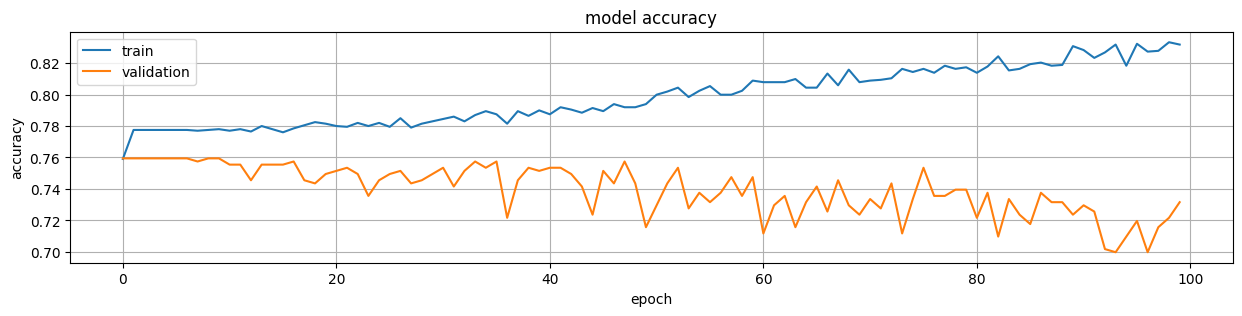

In [ ]:
plt.figure(figsize = (15,3))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()

Perceptron

In [ ]:
x_2d = x[['sc_TransactionAmount', 'sc_AccountBalance']]  # Select two features for plotting
y = df1['le_Channel']

In [ ]:
# Split data into training and testing sets (if not already done)
x_train, x_test, y_train, y_test = train_test_split(x_2d, y, test_size=0.30, random_state=1)

# Train the Perceptron classifier (if not already done)
per = Perceptron()
per.fit(x_train, y_train)

Perceptron()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but Perceptron was fitted with feature names



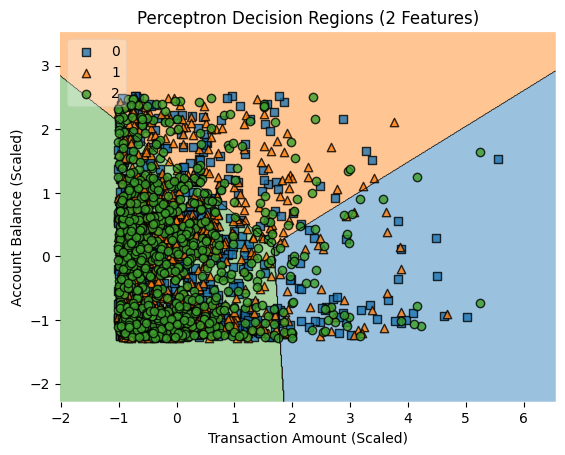

In [ ]:
# Plot the decision regions using the selected 2 features
plot_decision_regions(x_2d.values, y.values, clf=per, legend=2)
plt.xlabel('Transaction Amount (Scaled)')
plt.ylabel('Account Balance (Scaled)')  # Adjust y-axis label
plt.title('Perceptron Decision Regions (2 Features)')
plt.show()

In [ ]:
#per = Perceptron()
#per.fit(x_train,y_train)

per = Perceptron()
per.fit(x_train.values.reshape(-1, 1), y_train) # Reshape x_train to a 2D array

Perceptron()

In [ ]:
per.coef_

array([[-77.08],
       [574.65],
       [ 41.11]])

In [ ]:
per.intercept_

array([-68.,  95.,  99.])

ValueError: Filler values must be provided when X has more than 2 training features.

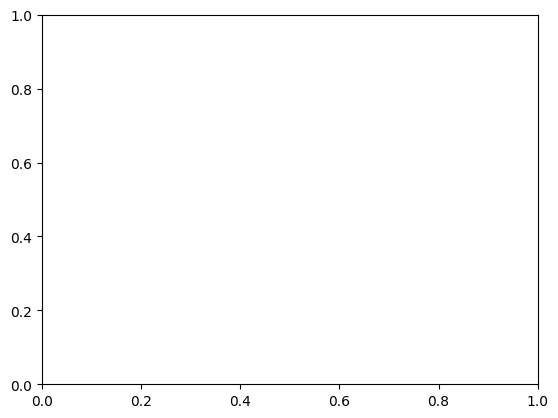

In [ ]:
plot_decision_regions(x.values, y.values, clf=per, legend=2)
plt.xlabel('Transaction Amount')
plt.ylabel('Channel')
plt.title('Perceptron Decision Regions')
plt.show()